In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns
import geopandas as gpd
import contextily as cx
from PIL import Image

from PlotsForPaper_Functions import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import sys
sys.path.append("ProcessModelResults/")
from my_functions import *

In [3]:
methods_dict = {'Idealised': ['6h_sp_fl_0.1', '6h_sp_fl_0.2', '6h_sp_fl_0.3', '6h_sp_fl_0.4','6h_sp_c_0.5',
          '6h_sp_bl_0.6','6h_sp_bl_0.7','6h_sp_bl_0.8','6h_sp_bl_0.9'],
                'Observed':['6h_feh_singlepeak', '6h_c1','6h_c2','6h_c3','6h_c4', '6h_c5', '6h_c6','6h_c7',
             '6h_c8','6h_c9','6h_c10', '6h_c11', '6h_c12','6h_c13','6h_c14','6h_c15'], 
               'SinglePeak_Scaled':['6h_sp_+0%','6h_sp_+5%','6h_sp_+10%','6h_sp_+15%','6h_sp_+20%']}

## Plot catchments

In [4]:
methods_key ='Idealised'
catchment_name = 'LinDyke'
model_directory = '../../FloodModelling/{}Models/Model_{}Profiles/'.format(catchment_name, methods_key)

In [5]:
sys.path.append("../")
from my_functions import *

if catchment_name == 'LinDyke':
    catchment_name_str = "Resampled.Terrain" 
    catchment_shpfilename = 'CatchmentLinDyke_exported'
    minx, miny, maxx, maxy  = 437000,  426500,  445500, 434300
    catchment_gdf = gpd.read_file(model_directory + 'CatchmentLinDyke_exported.shp')
    
elif catchment_name == 'WykeBeck':
    catchment_name_str = "Terrain.wykeDEM" 
    catchment_shpfilename = 'WykeBeckCatchment'
    minx, miny, maxx, maxy = 430004,  429978, 438660, 440996
    catchment_gdf = gpd.read_file(model_directory + 'WykeBeckCatchment.shp')
    
# Create a bounding box (this is used in preparing the rasters)
bbox = box(minx, miny, maxx, maxy)

<Axes: >

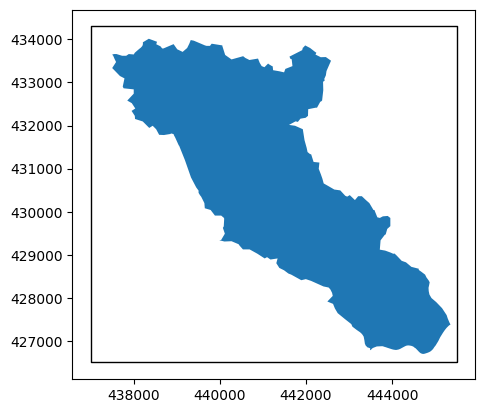

In [6]:
fig,ax=plt.subplots()
geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=CRS('EPSG:27700'))     
# Re-project into the same coordinate system as the raster data
geo = geo.to_crs(crs=CRS('EPSG:27700'))#data.crs.data
geo.plot(ax=ax,color='White', edgecolor='black')
catchment_gdf.plot(ax=ax, facecolor=None)

In [7]:
# # # depth_timeslice.flatten().shape
# # depth_timeslice[depth_timeslice>0.1].size
# # # Count the values which aren't NaN
# # np.isnan(depth_timeslice)
# np.count_nonzero(np.isnan(depth_timeslice))
# np.count_nonzero(depth_timeslice)
# # np.unique(depth_timeslice, return_counts=True)

# # Count the number of cells 
# size_of_array = depth_timeslice.size
# # Count the number of cells that are flooded
# number_flooded_cells = depth_timeslice[depth_timeslice>0.1].size
# #
# other_thing = depth_timeslice.size - np.count_nonzero(np.isnan(depth_timeslice))

# test_timeslice =np.array([0.2,0.4, 0.8])
# test_timeslice

# depth_timeslice[depth_timeslice>0.1]
# flooded_volume = np.sum(depth_timeslice[depth_timeslice>0.1])
# flooded_volume

In [26]:
n_flooded_cells_dict_2mins = {}
volumes_dict_2mins = {}
for method in ['6h_sp_bl_0.6']:
    print(method)
    n_flooded_cells_2mins = []
    volumes_2mins = []
    dates = []
    Hs=range(12,24)
    Ms= range(1,61,2)
    for H in Hs:
        for M in Ms:
            M = str(M).zfill(2)
            dates.append('{} {}'.format(H,M))
            fp = '../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/{}/Depth (01AUG2022 {} {} 00).Resampled.Terrain.tif'.format(method, H, M)
            try:
                depth_timeslice = prepare_rainfall_scenario_raster(fp, bbox, remove_little_values = False)[0]
                number_flooded_cells = depth_timeslice[depth_timeslice>0].size
                flooded_volume = np.sum(depth_timeslice[depth_timeslice>0])
                n_flooded_cells_2mins.append(number_flooded_cells)
                volumes_2mins.append(flooded_volume)
            except:
                print(fp)
    # Add to dict
    n_flooded_cells_dict_2mins[method] = n_flooded_cells_2mins
    volumes_dict_2mins[method] = volumes_2mins

6h_sp_bl_0.6


In [30]:
test_dict_5mins = {}
test_dict_volumes_5mins = {}
for method in methods_dict['Idealised']:
    print(method)
    n_flooded_cells_5mins = []
    volumes_5mins = []
    Hs=range(0,24)
    M = 0
    for day in [2,3]:
        for H in Hs:
                M = str(M).zfill(2)
                H = str(H).zfill(2)
                fp = '../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/{}/Depth (0{}AUG2022 {} {} 00).Resampled.Terrain.tif'.format(method, day, H, M)
                try:
                    depth_timeslice = prepare_rainfall_scenario_raster(fp, bbox, remove_little_values)[0]
                    number_flooded_cells = depth_timeslice[depth_timeslice>0.1].size
                    flooded_volume = np.sum(depth_timeslice[depth_timeslice>0.1])
                    n_flooded_cells_5mins.append(number_flooded_cells)
                    volumes_5mins.append(flooded_volume)
                except:
                    print(fp)
        # Add to dict
        test_dict_5mins[method] = n_flooded_cells_5mins
        test_dict_volumes_5mins[method] = volumes_5mins

6h_sp_fl_0.1
6h_sp_fl_0.2
6h_sp_fl_0.3
6h_sp_fl_0.4
6h_sp_c_0.5
6h_sp_bl_0.6
6h_sp_bl_0.7
6h_sp_bl_0.8
6h_sp_bl_0.9


In [16]:
n_flooded_cells_dict_5mins = {}
volumes_dict_5mins = {}
for method in ['6h_sp_fl_0.1', '6h_sp_fl_0.2', '6h_sp_fl_0.3', '6h_sp_fl_0.4', '6h_sp_c_0.5', '6h_sp_bl_0.7','6h_sp_bl_0.8']:
    print(method)
    n_flooded_cells_5mins = []
    volumes_5mins = []
    Hs=range(12,24)
    Ms= range(0,60,5)
    for H in Hs:
        for M in Ms:
            if H == 12 and M == 0:
                pass
            else:
                M = str(M).zfill(2)
                fp = '../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/{}/Depth (01AUG2022 {} {} 00).Resampled.Terrain.tif'.format(method, H, M)
                try:
                    depth_timeslice = prepare_rainfall_scenario_raster(fp, bbox, remove_little_values)[0]
                    number_flooded_cells = depth_timeslice[depth_timeslice>0.1].size
                    flooded_volume = np.sum(depth_timeslice[depth_timeslice>0.1])
                    n_flooded_cells_5mins.append(number_flooded_cells)
                    volumes_5mins.append(flooded_volume)            
                except:
                    print(fp)
    # Add to dict
    n_flooded_cells_dict_5mins[method] = n_flooded_cells_5mins
    volumes_dict_5mins[method] = volumes_5mins

6h_sp_fl_0.1
6h_sp_fl_0.2
6h_sp_fl_0.3
6h_sp_fl_0.4
6h_sp_c_0.5
6h_sp_bl_0.7
6h_sp_bl_0.8


In [27]:
df_2mins_allvalues = pd.DataFrame(n_flooded_cells_dict_2mins)
# df_5mins = pd.DataFrame(n_flooded_cells_dict_5mins)
# df_test = pd.DataFrame(volumes_dict_5mins)

# df_2mins.to_csv("df_2mins.csv",index=False)
#df_5mins.to_csv("df_5mins.csv",index=False)
# df_test.to_csv("df_test.csv",index=False)

In [91]:
df_2mins_allvalues  =pd.read_csv("df_2mins.csv")
df_5mins  =pd.read_csv("df_5mins.csv")
df_test  =pd.read_csv("df_test.csv")

In [30]:
df_2mins_allvalues[100:150]

,6h_sp_bl_0.6,minute
100,0.196688,201
101,0.201088,203
102,0.205747,205
103,0.210790,207
104,0.216209,209
105,0.222125,211
106,0.228808,213
107,0.236595,215
108,0.246171,217
109,0.253817,219


In [90]:
df_2mins_allvalues[100:150]

,6h_sp_bl_0.6,minute
100,0.431576,201
101,0.442944,203
102,0.455191,205
103,0.471520,207
104,0.485526,209
105,0.503904,211
106,0.522233,213
107,0.545929,215
108,0.571178,217
109,0.593067,219


In [28]:
df_2mins_allvalues = df_2mins_allvalues/1000000
# df_5mins = df_5mins/1000000
# df_test = df_test/1000000

In [29]:
df_2mins_allvalues['minute']= list(range(1,len(df_2mins_allvalues)*2,2))
# df_5mins['minute']= list(range(0,len(df_5mins)*5,5))
# df_test['minute']= list(range(720,(len(df_test)*60)+720,60))

# df_5mins[df_5mins['minute']==380]

In [41]:
# df_5mins = df_5mins *1000000
for column in df_test.columns[:-1]:
    print(df_test[column].max())

437058.33327674866
437428.2982349396
437392.424744606
437234.46375465393
436601.08533096313
437042.9446802139
437027.40298748016
436979.78718185425
437092.6897611618


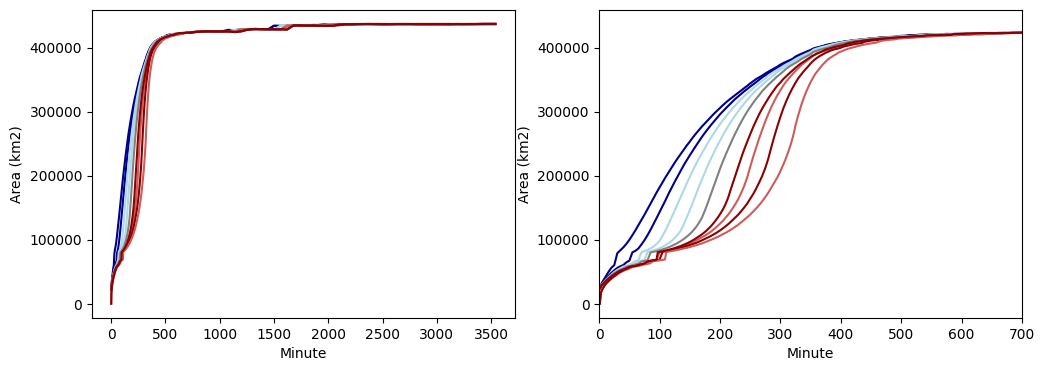

In [37]:
fig, ax = plt.subplots(ncols=2, figsize= (12,4))

df_2mins = pd.DataFrame(volumes_dict_2mins)
df_5mins = pd.DataFrame(volumes_dict_5mins)
df_test = pd.DataFrame(test_dict_volumes_5mins)

df_2mins['minute']= list(range(1,len(df_2mins)*2,2))
df_5mins['minute']= list(range(0,len(df_5mins)*5,5))
df_test['minute']= list(range(720,(len(df_test)*60)+720,60))

colors_2mins = ['indianred', 'darkred']
colors_5mins = ['darkblue', 'darkblue', 'lightblue', 'lightblue', 'grey','indianred','darkred' ]
colors_test = ['darkblue', 'darkblue', 'lightblue', 'lightblue', 'grey','indianred','indianred','darkred','darkred' ]

for number, column in enumerate(df_5mins.columns[:-1]):
      ax[0].plot(df_5mins["minute"], df_5mins[column], color = colors_5mins[number]);           
        
for number, column in enumerate(df_2mins.columns[:-1]):
      ax[0].plot(df_2mins["minute"], df_2mins[column], color = colors_2mins[number]); 
        
for number, column in enumerate(df_test.columns[:-1]):
      ax[0].plot(df_test["minute"], df_test[column], color = colors_test[number]);    
        
        
for number, column in enumerate(df_5mins.columns[:-1]):
      ax[1].plot(df_5mins["minute"], df_5mins[column], color = colors_5mins[number])
        
for number, column in enumerate(df_2mins.columns[:-1]):
      ax[1].plot(df_2mins["minute"], df_2mins[column], color = colors_2mins[number]); 
        
for number, column in enumerate(df_test.columns[:-1]):
      ax[1].plot(df_test["minute"], df_test[column], color = colors_test[number]);     
        
ax[1].set_xlim(0,700)
ax[0].set_ylabel('Area (km2)')
ax[1].set_ylabel('Area (km2)')
ax[0].set_xlabel('Minute')
ax[1].set_xlabel('Minute');     

# fig.savefig("ProcessModelResults/Outputs/Figs/FloodedArea_OverTime.PNG")